# Kidney Disease Prediction - Problem statement 12 - Group 186


| Group No. | Name | Student Email id | % Contribution |
| ----- | ----------- |----------- |----------- |
| 186	| Sivarajan N	| 2021FC04989@wilp.bits-pilani.ac.in	| Equal (100%) 
| 186	| Sindhu C	| 2021FC04993@wilp.bits-pilani.ac.in 	| Equal (100%) 
| 186	| Manibalan S	| 2021fc04442@wilp.bits-pilani.ac.in	| None (0%)


The main requirements are listed below which follows a standard Data Science Project:
* I - Presteps
	1. Download Dataset from Google Drive - https://drive.google.com/file/d/1NykVFA1f5oGXZ5JlrBGXPBJrnfRncREh/view?usp=sharing
	2. Import the required libraries
    
* II - Data Visualization & Exploration
	1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them. 
	2. Comment on class imbalance with appropriate visualization method. 
	3. Provide appropriate visualizations to get an insight about the dataset. 
	4. Do the correlational analysis on the dataset. Provide a visualization for the same. Justify the answer by answering this - Will this correlational analysis have effect on feature selection that we will perform in the next step? 

* III - Data Preprocessing, Feature Engineering & Cleaning
	1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. 
	2. Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. Apply the appropriate transformations depending upon the structure and the complexity of the dataset. Provide proper justification.

* IV - Model Building
	1. Split the dataset into training and test sets. Justify the choice of split. Experiment with different split to get the final split. Justify the method chosen. 
	2. Build Model Development using Decision Tree and KNN. Identify the best parameter and justify your answer.

* V - Validation, Performance Evaluation, Testing
	1. Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for the model chosen. 
	2. Compare the model in tabulated form. Justify your comment. Answer without justification will not be awarded marks.
 


### I - PRESTEPS - Import the required libraries

	1. Download Dataset from Google Drive - https://drive.google.com/file/d/1NykVFA1f5oGXZ5JlrBGXPBJrnfRncREh/view?usp=sharing
	2. Import the required libraries


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns
import missingno as msno

%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to avoid clutter of warnings in the screen.

## II - DATA VISUALIZATION & EXPLORATION

#### 1. Sanity check the dataset

In [46]:
df = pd.read_csv('kidney_disease.csv')
data = df
data.head(2) # Print 2 rows for sanity check

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd


In [47]:
df.shape

(400, 26)

In [105]:
data.head()

,id,age,bp,sg,al,su,ba,bgr,bu,sc,...,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,0.0,117.0,56.0,3.8,...,11.2,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,9,53.0,90.0,1.020,2.0,0.0,0.0,70.0,107.0,7.2,...,9.5,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,11,63.0,70.0,1.010,3.0,0.0,0.0,380.0,60.0,2.7,...,10.8,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,14,68.0,80.0,1.010,3.0,2.0,1.0,157.0,90.0,4.1,...,5.6,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,20,61.0,80.0,1.015,2.0,0.0,0.0,173.0,148.0,3.9,...,7.7,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0


- 26 columns including id and classification is present in the data rows.
- We have 25 + classification = 26 ( 12 numeric, 14 nominal)
- The attributes definition is described here - https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease# (link as provided)
- We are able to identify that all the features are present in the dataset and the target matches with them. 

#### 2 - Class Imbalance - Understanding the balancing of the data visually

In [49]:
# Let's find out how many of each class are

df['classification'].value_counts()


ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

The above output clearly shows that this dataset is close to <b>"imbalanced dataset"</b>, class balancing will be handled later well before the appropriate modelling steps.

#### 3. Data visualizations to get an insight about the dataset

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [51]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [52]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

#### 4. Correlation matrix & Matrix Visualisation

In [53]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


In [54]:
#Representation of Target variable in Percentage

countNoDisease = len(df[df['classification'] == 0])
countHaveDisease = len(df[df['classification'] == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df['classification']))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df['classification']))*100)))

Percentage of Patients Haven't Heart Disease: 0.00%
Percentage of Patients Have Heart Disease: 0.00%


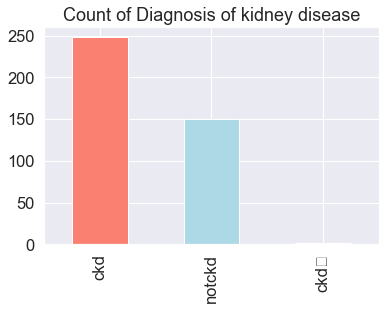

In [55]:

df['classification'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease");


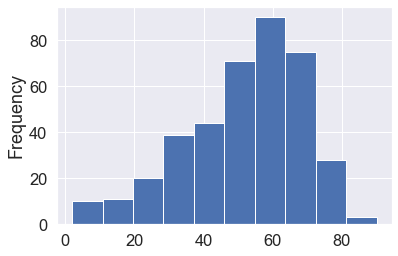

In [56]:
#Check the distribution of the age column with a histogram

df['age'].plot(kind='hist');

#### Justification:

- From the plot above and matrix evaluation done earlier, it is clearer that the data is quite imbalanced. This correlational analysis above will have an effect on the feature selection in the next step.

## III - DATA PREPREPROCESSING, FEATURE ENGINEERING & CLEANING

#### 1. Data Preprocessing steps - null check, missing value check, handling outliers, checking skewed data.

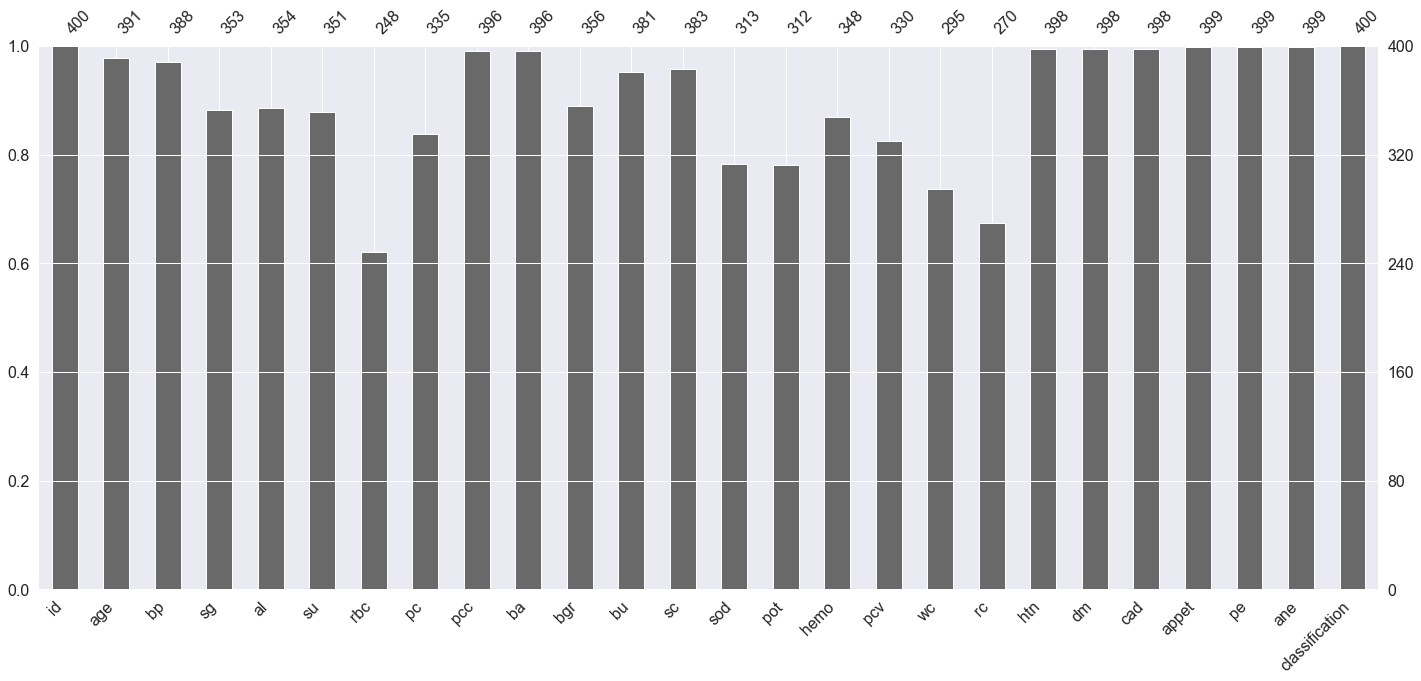

In [57]:
# Here we are plotting the graph to see the null values in the datset
p = msno.bar(data)

<b>Inference:</b> Here any features which are not touching the 400 mark at the top are having <b>null values</b>.

#### 2. Feature Engineering Techniques:

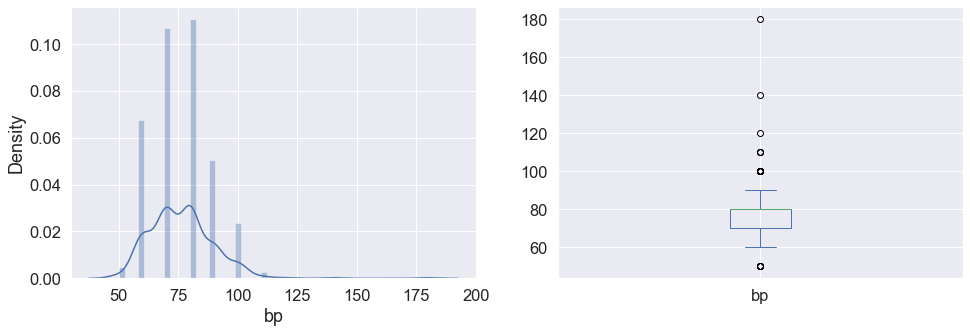

In [58]:
plt.subplot(121), sns.distplot(data['bp'])
plt.subplot(122), data['bp'].plot.box(figsize=(16,5))
plt.show()

<b>Inference</b>: Here in the above graph we can see the distribution of blood pressure and also in the subplot it is visible that <b>bp column has some outliers</b> in it.

In [59]:
data['classification'] = data['classification'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':0})
data['dm'] = data['dm'].map({'yes':1,'no':0})
data['cad'] = data['cad'].map({'yes':1,'no':0})
data['appet'] = data['appet'].map({'good':1,'poor':0})
data['ane'] = data['ane'].map({'yes':1,'no':0})
data['pe'] = data['pe'].map({'yes':1,'no':0})
data['ba'] = data['ba'].map({'present':1,'notpresent':0})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':0})
data['pc'] = data['pc'].map({'abnormal':1,'normal':0})
data['rbc'] = data['rbc'].map({'abnormal':1,'normal':0})

In [60]:
data['classification'].value_counts()

1.0    248
0.0    150
Name: classification, dtype: int64

#### Feature Selection:
Based on Medical journals - The Below attributes will effect kidney in a drastically bad way:

- Diabetes (dm) - blood sugar or diabetes mellitus
- Blood pressure (bp)
- Heart and blood vessel (cardiovascular) disease (cad)
- Older age (age)

The absolute values of the correlations between features and the class label show that blood pressure, albumin, sugar, blood urea, serum creatinine, potassium, white blood cell count, and hypertension all have positive links. 

Also, based on medical information, we realize that this dataset has a lot of multicollinearities. The variables Red Blood Cells (rbc), Pus Cell (pc), Pus Cell clumps (pcc) and Packed Cell Volume (pcv) are all related to Hemoglobin (hemo) so they could be removed, and the model would not suffer.


<AxesSubplot:>

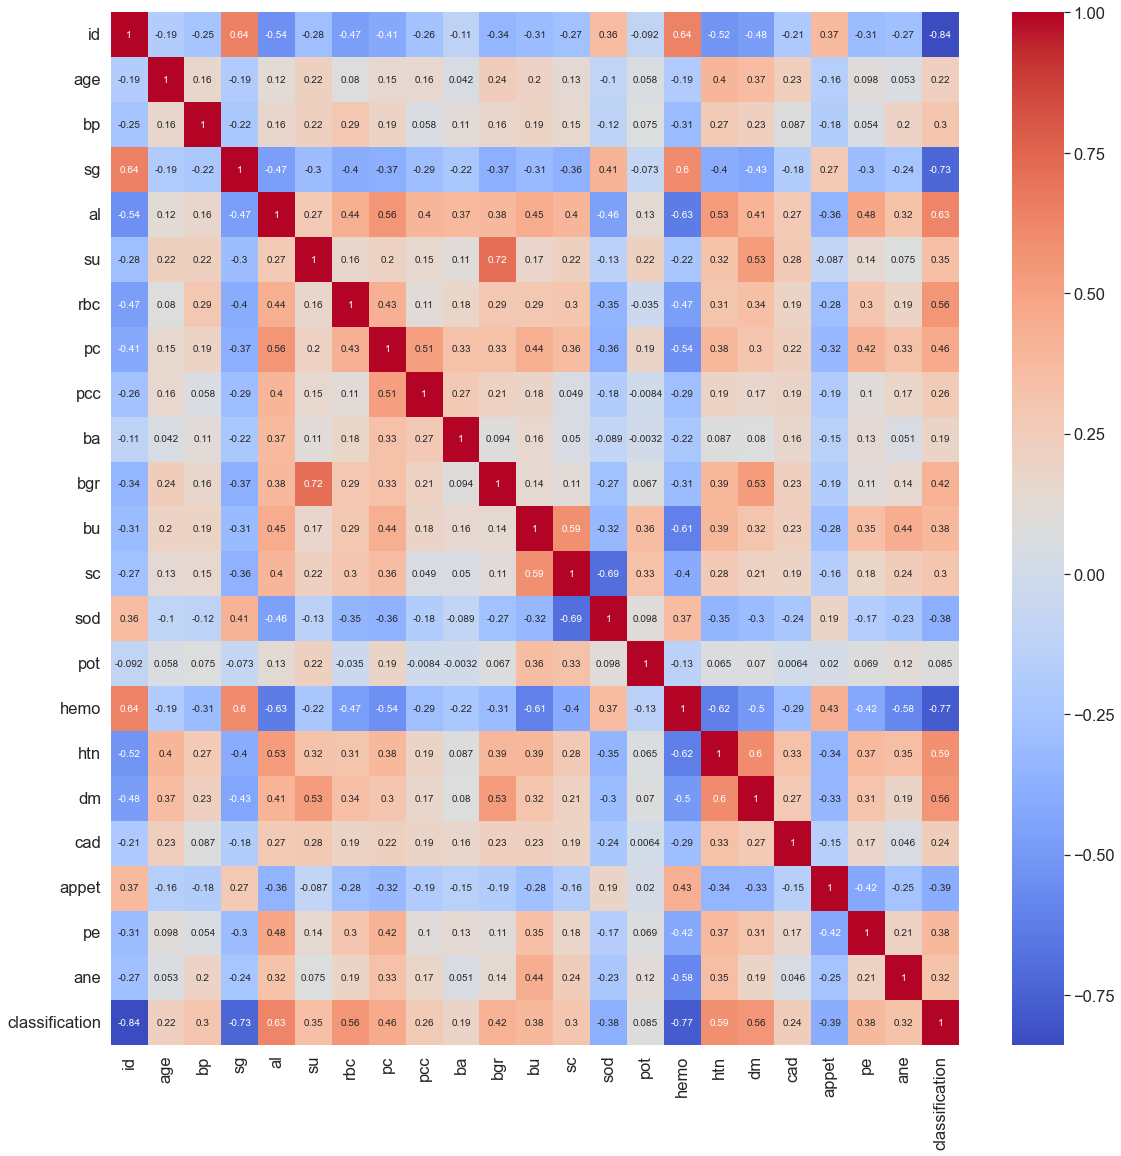

In [61]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row 

In [62]:
data.shape

(400, 26)

In [63]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [64]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification      2
dtype: int64

In [65]:
data.shape[0], data.dropna().shape[0]

(400, 158)

#### Justification:
Here from the above output we can see that there are 158 null values in the dataset. Now here we are left with two choices that we could either drop all the null values or to keep them, when we will drop those NA valus so we should understand that our dataset is not that large and if we drop those null values then it would be even smaller in that caseif we provide very less data to our machine learnig model then the performance would be very less also we yet don't know that these null values are related to some other features in the dataset.

So for this time we will keep these values and see how the model will perform in this dataset.

Also when we are working on some healthcare project where we will be predicting that whether the person is suffering about that disease or not then one thing we should keep in my mind that the model evaluation should have the least false postive errors.

In [66]:
data.dropna(inplace=True)

In [67]:
data.shape

(158, 26)

In [68]:
# Drop the variables Red Blood Cells (rbc), Pus Cell (pc), Pus Cell clumps (pcc) 
# and Packed Cell Volume (pcv) as they are all related to Hemoglobin (hemo).
data.drop(columns=['rbc','pc','pcc','pcv'], inplace=True)

### III. MODEL BUILDING

<b>Split the dataset, justify the split, and then build the models</b>

We will apply three different models:
- Logistic Regression
- KNN 
- Decision Tree

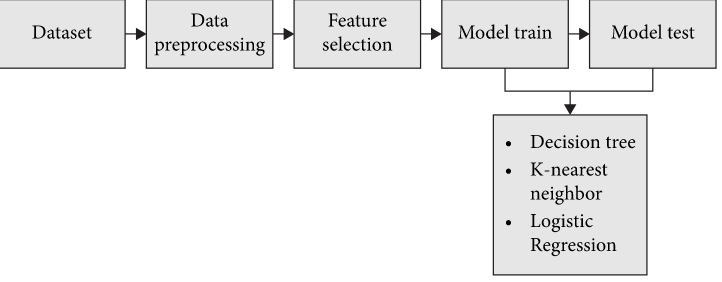

#### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logreg = LogisticRegression()

In [71]:
X = data.iloc[:,:-1]
y = data['classification']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)

In [73]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [74]:
#Training score

logreg.score(X_train,y_train)

1.0

In [75]:
#Testing accuracy

logreg.score(X_test,y_test)

1.0

In [76]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

Train Accuracy:  1.0
Test Accuracy:  1.0


The cell below shows the coefficients for each variable.
Example on reading the coefficients from a Logistic Regression: a one unit increase in age makes an individual about e^0.14 time as likely to have ckd, while a one unit increase in blood pressure makes an individual about e^-0.07 times as likely to have ckd.

In [79]:
pd.DataFrame(logreg.coef_, columns=X.columns)

,id,age,bp,sg,al,su,ba,bgr,bu,sc,...,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.160746,0.056088,0.077033,0.000186,0.016178,0.005611,0.00384,0.101004,0.117628,0.018759,...,0.001208,-0.023455,0.000878,-0.004967,0.003033,0.002984,0.00005,-0.000135,0.002821,0.000886


### Confusion Matrix
- The confusion matrix is a matrix used to determine the performance of the classification models for a given set of test data.

In [80]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    This function will be helping in plotting the confusion matrix by using seaborn
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


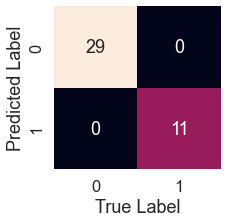

In [81]:
log_pred = logreg.predict(X_test)
plot_conf_mat(y_test, log_pred)

In [82]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 29
False Pos: 0
False Neg: 0
True Pos: 11


#### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [84]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [85]:
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 1.0


#### K-Nearest Neighbors Classifier

It is a good practice to first balance the class well before using the KNN, as we know that in the case of unbalanced classes KNN does'nt performs well.

In [86]:
df["classification"].value_counts()

0.0    115
1.0     43
Name: classification, dtype: int64

In [87]:
balanced_df = pd.concat([df[df["classification"] == 0], df[df["classification"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)

In [88]:
balanced_df["classification"].value_counts()

0.0    115
1.0    115
Name: classification, dtype: int64

In [89]:
X = balanced_df.drop("classification", axis=1)
y = balanced_df["classification"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [91]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#### Justification - Feature transformation techniques using Standardization

- Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
- Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.
- The appropriate transformation depending upon the structure and the complexity of our dataset is Standardization. Unlike normalization, standardization does not have a bounding range.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
    knn = KNeighborsClassifier()

    params = {
        "n_neighbors":[3,5,7,9],
        "weights":["uniform","distance"],
        "algorithm":["ball_tree","kd_tree","brute"],
        "leaf_size":[25,30,35],
        "p":[1,2]
    }

    gs = GridSearchCV(knn, param_grid=params)

    model = gs.fit(X_train,y_train)

    preds = model.predict(X_test)

    accuracy_score(y_test, preds)

1.0

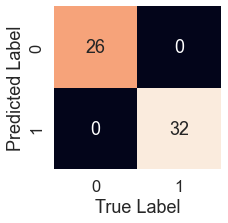

In [94]:
knn_pred = model.predict(X_test)
plot_conf_mat(y_test, knn_pred)

In [95]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 26
False Pos: 0
False Neg: 0
True Pos: 32


### Feature Importance

In [96]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable

feature_dict=dict(zip(df.columns,list(logreg.coef_[0])))
feature_dict

#This is a type of Model driven Exploratory data analysis

{'id': -0.16074621510363382,
 'age': 0.05608829155959107,
 'bp': 0.07703314744081255,
 'sg': 0.0001861221888716833,
 'al': 0.016178146418137227,
 'su': 0.0056112447575949005,
 'ba': 0.0038397720817552913,
 'bgr': 0.10100427769045475,
 'bu': 0.11762829736801209,
 'sc': 0.018759382555992486,
 'sod': 0.009611134941195242,
 'pot': 0.0012081167624675257,
 'hemo': -0.023455181094228582,
 'wc': 0.0008776449079850037,
 'rc': -0.004967077270421229,
 'htn': 0.0030334191767438265,
 'dm': 0.0029843979317836513,
 'cad': 4.9773514079551205e-05,
 'appet': -0.00013450171101414126,
 'pe': 0.002821345305416249,
 'ane': 0.0008858398082939757}

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Frequency'>

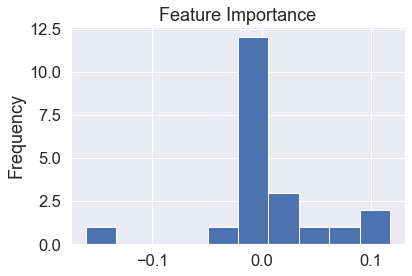

In [97]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="hist",legend=False,title="Feature Importance")

<AxesSubplot:title={'center':'Feature Importance'}>

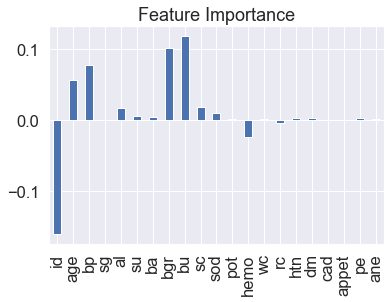

In [98]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

## Saving model

In [99]:
import pickle
 
# Now with the help of pickle model we will be saving the trained model
saved_model = pickle.dumps(logreg)
 
# Load the pickled model
logreg_from_pickle = pickle.loads(saved_model)
 
# Now here we will load the model
logreg_from_pickle.predict(X_test)

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1.])

### Another method

In [100]:
# Now with open function we will save the kidney disease predcition model in write mode
with open('kidney_disease_prediction.pkl', 'wb') as files:
    pickle.dump(logreg, files)

In [101]:
 # load saved model
with open('kidney_disease_prediction.pkl' , 'rb') as f:
    model = pickle.load(f)

In [102]:
# check prediction
# lr.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]) # similar

logreg.predict(X_test)

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1.])

In [103]:
df.head()

,id,age,bp,sg,al,su,ba,bgr,bu,sc,...,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,0.0,117.0,56.0,3.8,...,11.2,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
9,9,53.0,90.0,1.020,2.0,0.0,0.0,70.0,107.0,7.2,...,9.5,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
11,11,63.0,70.0,1.010,3.0,0.0,0.0,380.0,60.0,2.7,...,10.8,4500,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
14,14,68.0,80.0,1.010,3.0,2.0,1.0,157.0,90.0,4.1,...,5.6,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
20,20,61.0,80.0,1.015,2.0,0.0,0.0,173.0,148.0,3.9,...,7.7,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [104]:
# putting datapoints in the model it will either return 0 or 1 i.e. person having chronic kideny disease or not
logreg.predict([[3,48,80,1.02,1,0,2,0,0,1,1,0,1,1,2,0,0,1,0,1,2]]) 

array([1.])

## Summary

In this Machine Learning Assignment we have used various machine learning model to classify and predict whether the patient will have chronic kidney problems or not based on the data of patients.

KNN required class balancing, scaling, and model tuning to perform with 100% accuracy, while Logistic Regression was 100% accurate without tuning (note: we still had to stratify the train test split). 

Decision Tree in our case seems to be a better model as it provide 100% accuracy yet it used a least resources as it even does'nt required the model tuning.

| Model | Salient Features | Accuracy |
| ----- | ----------- |----------- |
| KNN	| Required Class Balancing and model tuning	| 100 % | 
| Decision Tree	| Decision trees are easy to interpret and visualize.	| 100% | 
| Logistic Regression	| A better model, used least resources and didn't need tuning | 100% |

